## Face and Facial Keypoint detection

After you've trained a neural network to detect facial keypoints, you can then apply this network to *any* image that includes faces. The neural network expects a Tensor of a certain size as input and, so, to detect any face, you'll first have to do some pre-processing.

1. Detect all the faces in an image using a face detector (we'll be using a Haar Cascade detector in this notebook).
2. Pre-process those face images so that they are grayscale, and transformed to a Tensor of the input size that your net expects. This step will be similar to the `data_transform` you created and applied in Notebook 2, whose job was tp rescale, normalize, and turn any iimage into a Tensor to be accepted as input to your CNN.
3. Use your trained model to detect facial keypoints on the image.

---

In the next python cell we load in required libraries for this section of the project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#### Select an image 

Select an image to perform facial keypoint detection on; you can select any image of faces in the `images/` directory.

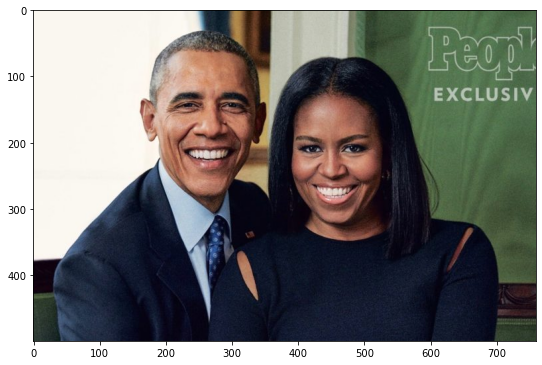

In [2]:
import cv2
# load in color image for face detection
image = cv2.imread(r"C:\Users\holar\Downloads\obamas.jpg")

# switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

## Detect all faces in an image

Next, you'll use one of OpenCV's pre-trained Haar Cascade classifiers, all of which can be found in the `detector_architectures/` directory, to find any faces in your selected image.

In the code below, we loop over each face in the original image and draw a red square on each face (in a copy of the original image, so as not to modify the original). You can even [add eye detections](https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html) as an *optional* exercise in using Haar detectors.

An example of face detection on a variety of images is shown below.

<img src='images/haar_cascade_ex.png' width=80% height=80%/>


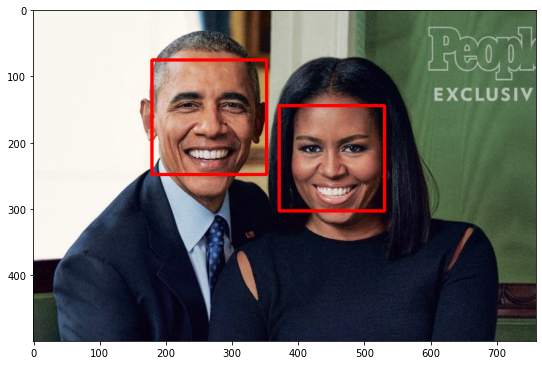

In [3]:
# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier(r"C:\Users\holar\Downloads\haarcascade_frontalface_default.xml_files\haarcascade_frontalface_default.xml.download")

# run the detector
# the output here is an array of detections; the corners of each detection box
# if necessary, modify these parameters until you successfully identify every face in a given image
faces = face_cascade.detectMultiScale(image, 1.2, 2)

# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

## Loading in a trained model

Once you have an image to work with (and, again, you can select any image of faces in the `images/` directory), the next step is to pre-process that image and feed it into your CNN facial keypoint detector.

First, load your best model by its filename.

In [4]:
import torch
from models import Net

net = Net()

## TODO: load the best saved model parameters (by your path name)
## You'll need to un-comment the line below and add the correct name for *your* saved model
net.load_state_dict(torch.load(r"C:\Users\holar\Downloads\udacity\udacitykeypoints_model_1.pt"))

## print out your net and prepare it for testing (uncomment the line below)
net.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(64, 512, kernel_size=(5, 5), stride=(1, 1))
  (conv5): Conv2d(512, 512, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1229312, out_features=680, bias=True)
  (fc1_drop): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=680, out_features=136, bias=True)
)

## Keypoint detection

Now, we'll loop over each detected face in an image (again!) only this time, you'll transform those faces in Tensors that your CNN can accept as input images.

### TODO: Transform each detected face into an input Tensor

You'll need to perform the following steps for each detected face:
1. Convert the face from RGB to grayscale
2. Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
3. Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
4. Reshape the numpy image into a torch image.

**Hint**: The sizes of faces detected by a Haar detector and the faces your network has been trained on are of different sizes. If you find that your model is generating keypoints that are too small for a given face, try adding some padding to the detected `roi` before giving it as input to your model.

You may find it useful to consult to transformation code in `data_load.py` to help you perform these processing steps.


### TODO: Detect and display the predicted keypoints

After each face has been appropriately converted into an input Tensor for your network to see as input, you can apply your `net` to each face. The ouput should be the predicted the facial keypoints. These keypoints will need to be "un-normalized" for display, and you may find it helpful to write a helper function like `show_keypoints`. You should end up with an image like the following with facial keypoints that closely match the facial features on each individual face:

<img src='images/michelle_detected.png' width=30% height=30%/>




In [ ]:
transformed=FacialKeypointsDataset

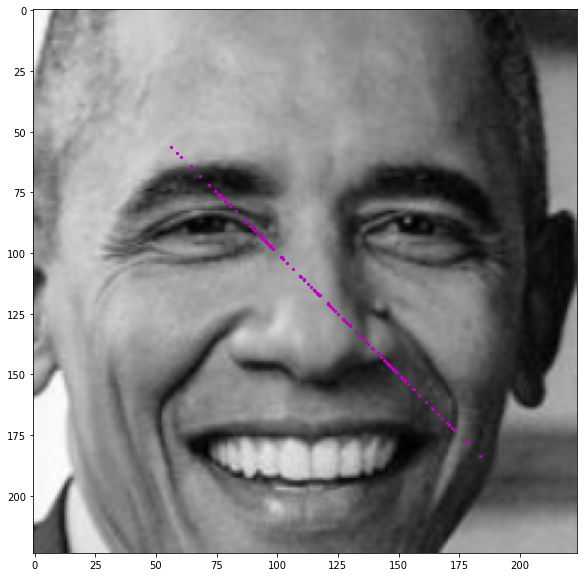

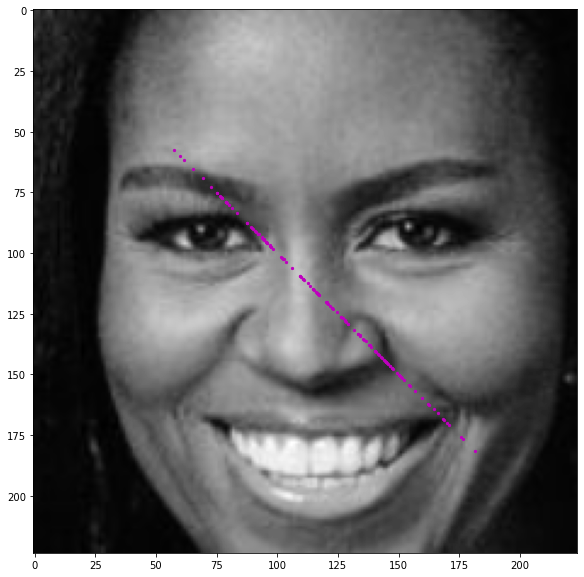

In [17]:
image_copy = np.copy(image)

# loop over the detected faces from your haar cascade
for (x,y,w,h) in faces:
    
    # Select the region of interest that is the face in the image 
    roi = image_copy[y:y+h, x:x+w]
    ## TODO: Convert the face region from RGB to grayscale
    roi=cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
    ## TODO: Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
    roi=roi/255.
    ## TODO: Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
    roi = cv2.resize(roi, (224,224))
    roi_reshaped = roi.reshape(roi.shape[0], roi.shape[1], 1)
    roi_transpose = roi_reshaped.transpose((2, 0, 1))
    roi_transpose = roi_transpose.reshape(1, roi_transpose.shape[0], roi_transpose.shape[1], roi_transpose.shape[2])
    roi_tensor = torch.from_numpy(roi_transpose)
    dtype = torch.FloatTensor
    roi_tensor = roi_tensor.type(dtype)
    #roi = roi.unsqueeze(0)
    #roi=roi.permute(0,3,1,2)
    ## TODO: Make facial keypoint predictions using your loaded, trained network 
    pred = net(roi_tensor)
    ## TODO: Display each detected face and the corresponding keypoints        
    plt.figure(figsize=[20,10])
    roi_tensor = roi_tensor.reshape(roi_tensor.shape[2], roi_tensor.shape[3])
    pred=pred.detach().numpy()
    pred = pred*50.0 +100
    plt.imshow(roi_tensor, cmap='gray')
    plt.scatter(pred, pred, s=20, marker='.', c='m')

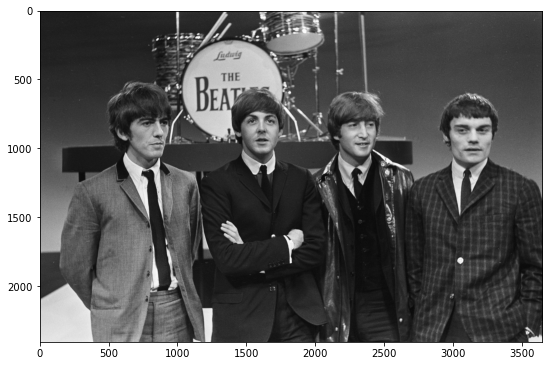

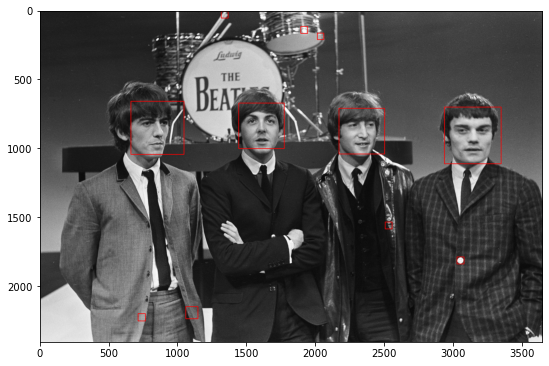

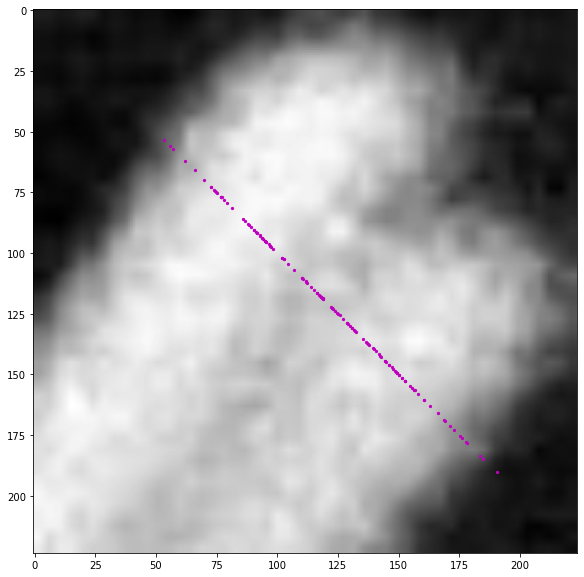

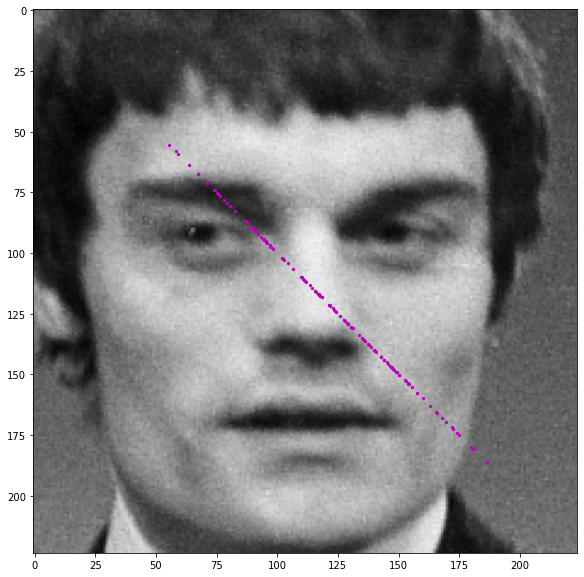

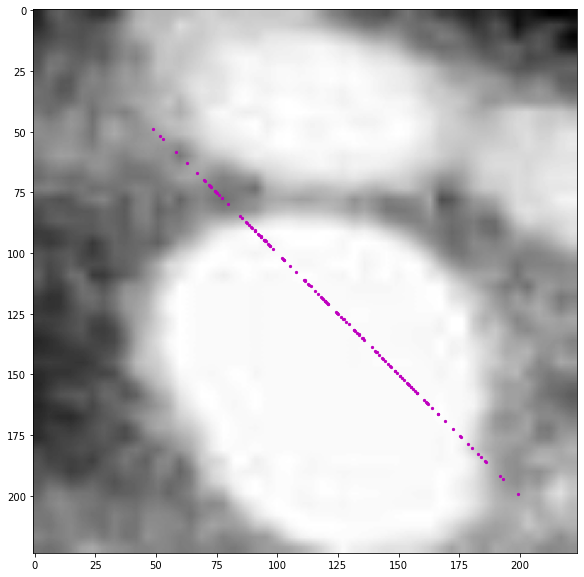

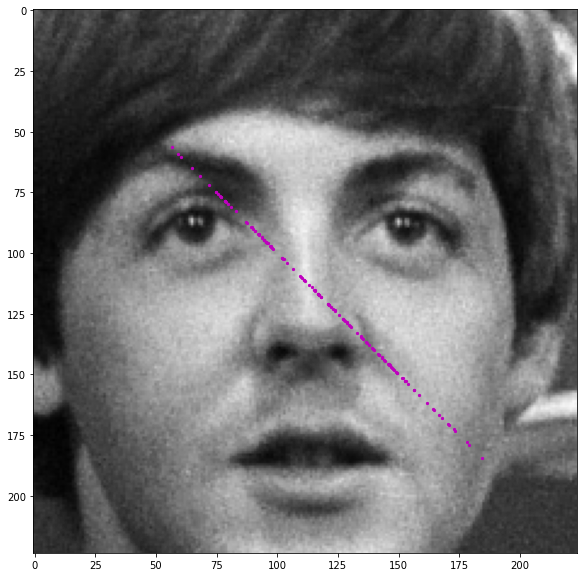

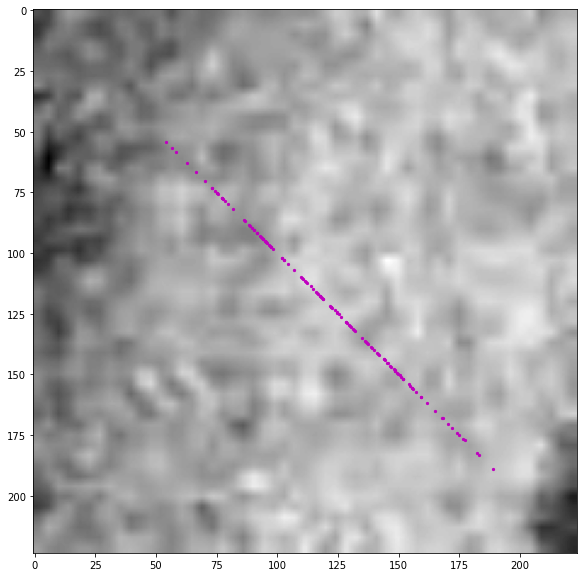

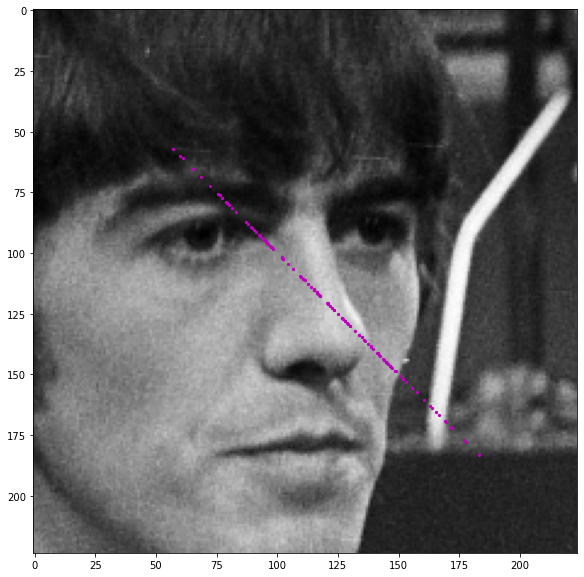

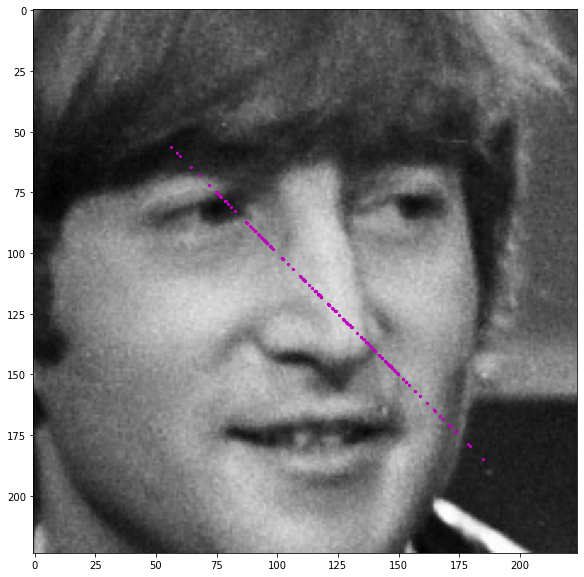

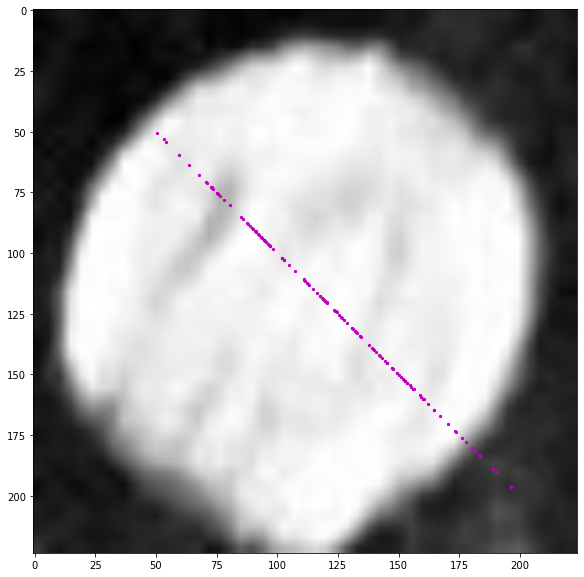

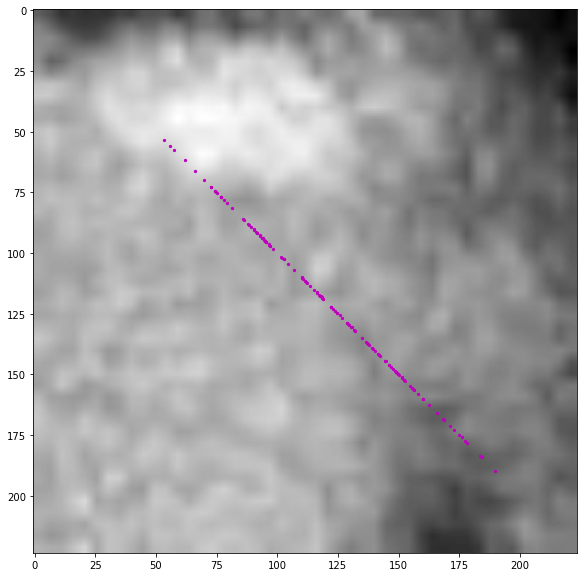

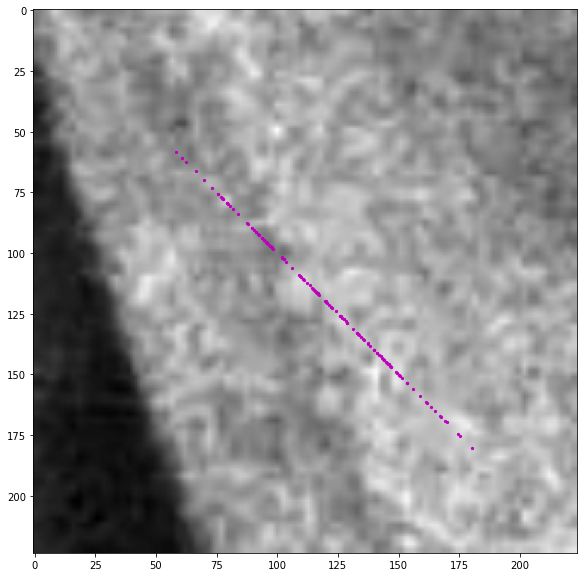

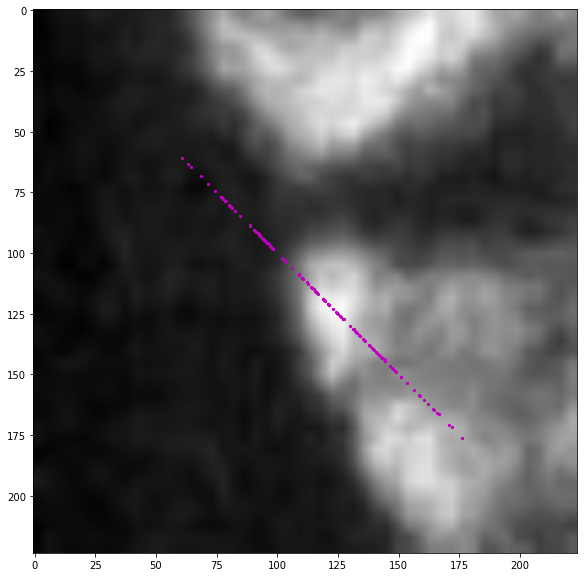

In [9]:
image = cv2.imread(r"C:\Users\holar\Downloads\the_beatles.jpg")

# switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier(r"C:\Users\holar\Downloads\haarcascade_frontalface_default.xml_files\haarcascade_frontalface_default.xml.download")

# run the detector
# the output here is an array of detections; the corners of each detection box
# if necessary, modify these parameters until you successfully identify every face in a given image
faces = face_cascade.detectMultiScale(image, 1.2, 2)

# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

image_copy = np.copy(image)

# loop over the detected faces from your haar cascade
for (x,y,w,h) in faces:
    
    # Select the region of interest that is the face in the image 
    roi = image_copy[y:y+h, x:x+w]
    roi = cv2.resize(roi, (224,224))
    ## TODO: Convert the face region from RGB to grayscale
    roi=cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
    ## TODO: Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
    roi=roi/255.
    ## TODO: Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
    roi = roi.reshape(roi.shape[0], roi.shape[1],1)
    ## TODO: Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    roi= torch.from_numpy(roi)
    roi = roi.type(torch.FloatTensor)
    roi = roi.unsqueeze(0)
    roi=roi.permute(0,3,1,2)
    ## TODO: Make facial keypoint predictions using your loaded, trained network 
    pred = net(roi)
    ## TODO: Display each detected face and the corresponding keypoints        
    plt.figure(figsize=[20,10])
    roi = roi.reshape(roi.shape[2], roi.shape[3])
    pred=pred.detach().numpy()
    pred = pred*50.0 +100
    plt.imshow(roi, cmap='gray')
    plt.scatter(pred, pred, s=20, marker='.', c='m')

In [7]:
roi.shape

torch.Size([1, 224, 1, 224])

In [12]:
pred

array([[ 57.63701 ,  94.346756,  60.129597, 109.24049 ,  61.49217 ,
        122.98408 ,  65.49606 , 135.26047 ,  69.2282  , 149.5015  ,
         78.96901 , 162.57947 ,  89.48143 , 170.887   ,  98.23532 ,
        176.45312 , 114.89772 , 181.51476 , 133.17456 , 175.64609 ,
        144.47147 , 170.14651 , 151.29921 , 162.17194 , 159.7666  ,
        147.23407 , 164.39838 , 136.391   , 166.03992 , 122.42297 ,
        168.72487 , 109.67092 , 168.16658 ,  94.35672 ,  72.62285 ,
         81.2556  ,  79.36398 ,  77.45252 ,  87.741486,  76.81717 ,
         95.973404,  76.35042 , 101.82599 ,  79.02591 , 126.338295,
         78.900375, 133.92618 ,  77.31019 , 141.67856 ,  75.23111 ,
        150.2721  ,  75.16253 , 156.79596 ,  80.12163 , 116.79443 ,
         92.324265, 116.43251 , 103.822945, 116.9055  , 113.554855,
        116.27328 , 120.175514, 106.28299 , 126.93182 , 110.71573 ,
        129.20802 , 115.85942 , 129.01706 , 120.8257  , 127.74438 ,
        124.474304, 126.475075,  83.40275 ,  94.